

---

### Problem Statement:

**Predicting Car Sales Prices Using Machine Learning**

In today's competitive automotive market, pricing vehicles correctly is crucial for maximizing sales and profitability. However, determining the optimal price for each car can be challenging due to various factors such as market demand, vehicle specifications, and economic conditions. To address this challenge, we aim to develop a machine learning model that accurately predicts car sales prices based on relevant attributes.
![Car Sales Prediction](https://repository-images.githubusercontent.com/286819592/b82e14cf-3c85-4f91-84c0-bea095c353a8)
### Column Names and Descriptions:

- **Manufacturer**: The brand or company that produced the car.
- **Model**: The specific model of the car.
- **Year**: The manufacturing year of the car.
- **Mileage**: The total distance the car has traveled in miles.
- **Fuel_Type**: The type of fuel used by the car (e.g., petrol, diesel).
- **Transmission**: The transmission type of the car (e.g., manual, automatic).
- **Engine_Size**: The engine size of the car in liters.
- **Horsepower**: The horsepower of the car.
- **Body_Type**: The body type of the car (e.g., sedan, SUV, hatchback).
- **Color**: The color of the car.
- **Condition**: The overall condition of the car (e.g., excellent, good, fair).
- **Price**: The selling price of the car (target variable).

By leveraging historical sales data and utilizing machine learning algorithms, we intend to build a predictive model that can accurately estimate the selling price of cars. This model will assist automotive dealerships and sellers in setting competitive and optimal prices for their inventory, ultimately leading to increased sales and profitability.


#### Importing Libraries

In [2]:
### Data Wrangling 

import numpy as np  # Importing numpy for numerical computations
import pandas as pd  # Importing pandas for data manipulation
import missingno  as mn # Importing missingno for visualizing missing data patterns
from collections import Counter  # Importing Counter for counting occurrences
from collections import OrderedDict  # Importing OrderedDict for ordered dictionaries

### Data Visualization

import matplotlib.pyplot as plt  # Importing matplotlib for basic plotting
import seaborn as sns  # Importing seaborn for statistical data visualization

### Data Preprocessing

import statsmodels.api as sm  # Importing statsmodels for statistical models and tests
from scipy import stats  # Importing stats from scipy for statistical functions

### Modelling 

from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data
from math import sqrt  # Importing sqrt for square root operation
from sklearn.metrics import mean_squared_error, r2_score  # Importing evaluation metrics
from sklearn.model_selection import GridSearchCV  # Importing GridSearchCV for hyperparameter tuning
from sklearn.linear_model import LinearRegression  # Importing LinearRegression for linear regression modeling
from sklearn.linear_model import Lasso  # Importing Lasso for Lasso regression
from sklearn.linear_model import Ridge  # Importing Ridge for Ridge regression
from sklearn.svm import SVR  # Importing SVR for Support Vector Regression
from sklearn.tree import DecisionTreeRegressor  # Importing DecisionTreeRegressor for decision tree modeling
from sklearn.ensemble import RandomForestRegressor  # Importing RandomForestRegressor for random forest modeling
from sklearn.ensemble import StackingRegressor  # Importing StackingRegressor for stacking models
import xgboost as xg  # Importing xgboost for gradient boosting modeling

### Tabulating the results

from tabulate import tabulate  # Importing tabulate for tabulating results

### Remove unnecessary warnings

import warnings  # Importing warnings module
warnings.filterwarnings('ignore')  # Ignoring warnings


### Exploring The Data

In [3]:
# loading the data
dataset = pd.read_csv('Car_sales.csv')

In [4]:
#Top 5 rows
dataset.head().style.background_gradient(cmap='cool')

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919000,16.360000,Passenger,21.500000,1.800000,140.000000,101.200000,67.300000,172.400000,2.639000,13.200000,28.000000,2/2/2012,58.280150
1,Acura,TL,39.384000,19.875000,Passenger,28.400000,3.200000,225.000000,108.100000,70.300000,192.900000,3.517000,17.200000,25.000000,6/3/2011,91.370778
2,Acura,CL,14.114000,18.225000,Passenger,nan,3.200000,225.000000,106.900000,70.600000,192.000000,3.470000,17.200000,26.000000,1/4/2012,nan
3,Acura,RL,8.588000,29.725000,Passenger,42.000000,3.500000,210.000000,114.600000,71.400000,196.600000,3.850000,18.000000,22.000000,3/10/2011,91.389779
4,Audi,A4,20.397000,22.255000,Passenger,23.990000,1.800000,150.000000,102.600000,68.200000,178.000000,2.998000,16.400000,27.000000,10/8/2011,62.777639


In [5]:
from tabulate import tabulate

def analyze_dataset(dataset):
    # Columns in Data
    columns_info = [["Column Name", "Data Type"]]
    for col in dataset.columns:
        columns_info.append([col, dataset[col].dtype])
    columns_table = tabulate(columns_info, headers="firstrow", tablefmt="grid")

    # Number of rows and columns
    num_rows, num_cols = dataset.shape
    shape_table = tabulate([["Number of rows:", num_rows], ["Number of columns:", num_cols]], tablefmt="grid")

    # Data Types
    data_types_table = tabulate(dataset.dtypes.to_frame().reset_index(), headers="keys", tablefmt="grid")

    # Column-wise Missing Data
    missing_data_table = tabulate(dataset.isnull().sum().to_frame().reset_index(), headers=["Column", "Missing Data"], tablefmt="grid")

    # Prepare output
    output = ""
    output += "Columns in Data:\n{}\n\n".format(columns_table)
    output += "Number of rows and columns:\n{}\n\n".format(shape_table)
    output += "Data Types:\n{}\n\n".format(data_types_table)
    output += "Column-wise Missing Data:\n{}\n\n".format(missing_data_table)

    return output

# Usage
print(analyze_dataset(dataset))


Columns in Data:
+---------------------+-------------+
| Column Name         | Data Type   |
+=====================+=============+
| Manufacturer        | object      |
+---------------------+-------------+
| Model               | object      |
+---------------------+-------------+
| Sales_in_thousands  | float64     |
+---------------------+-------------+
| __year_resale_value | float64     |
+---------------------+-------------+
| Vehicle_type        | object      |
+---------------------+-------------+
| Price_in_thousands  | float64     |
+---------------------+-------------+
| Engine_size         | float64     |
+---------------------+-------------+
| Horsepower          | float64     |
+---------------------+-------------+
| Wheelbase           | float64     |
+---------------------+-------------+
| Width               | float64     |
+---------------------+-------------+
| Length              | float64     |
+---------------------+-------------+
| Curb_weight         | float64  

In [6]:
# Columns in Data
for i in dataset.columns:
    print(i)

Manufacturer
Model
Sales_in_thousands
__year_resale_value
Vehicle_type
Price_in_thousands
Engine_size
Horsepower
Wheelbase
Width
Length
Curb_weight
Fuel_capacity
Fuel_efficiency
Latest_Launch
Power_perf_factor


In [7]:
# no of rows and columns
print("The Number of the are :" , dataset.shape[0])

print("The Number of the columns are:" , dataset.shape[1])
dataset.dtypes

The Number of the are : 157
The Number of the columns are: 16


Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [8]:
# info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [9]:
# dtypes
dataset.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [10]:
# setting proper data types
dataset.Manufacturer = dataset.Manufacturer.astype('category')
dataset.Model = dataset.Model.astype('category')
dataset.Vehicle_type = dataset.Vehicle_type.astype('category')

The column wise missing data is give below
Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64


<Axes: >

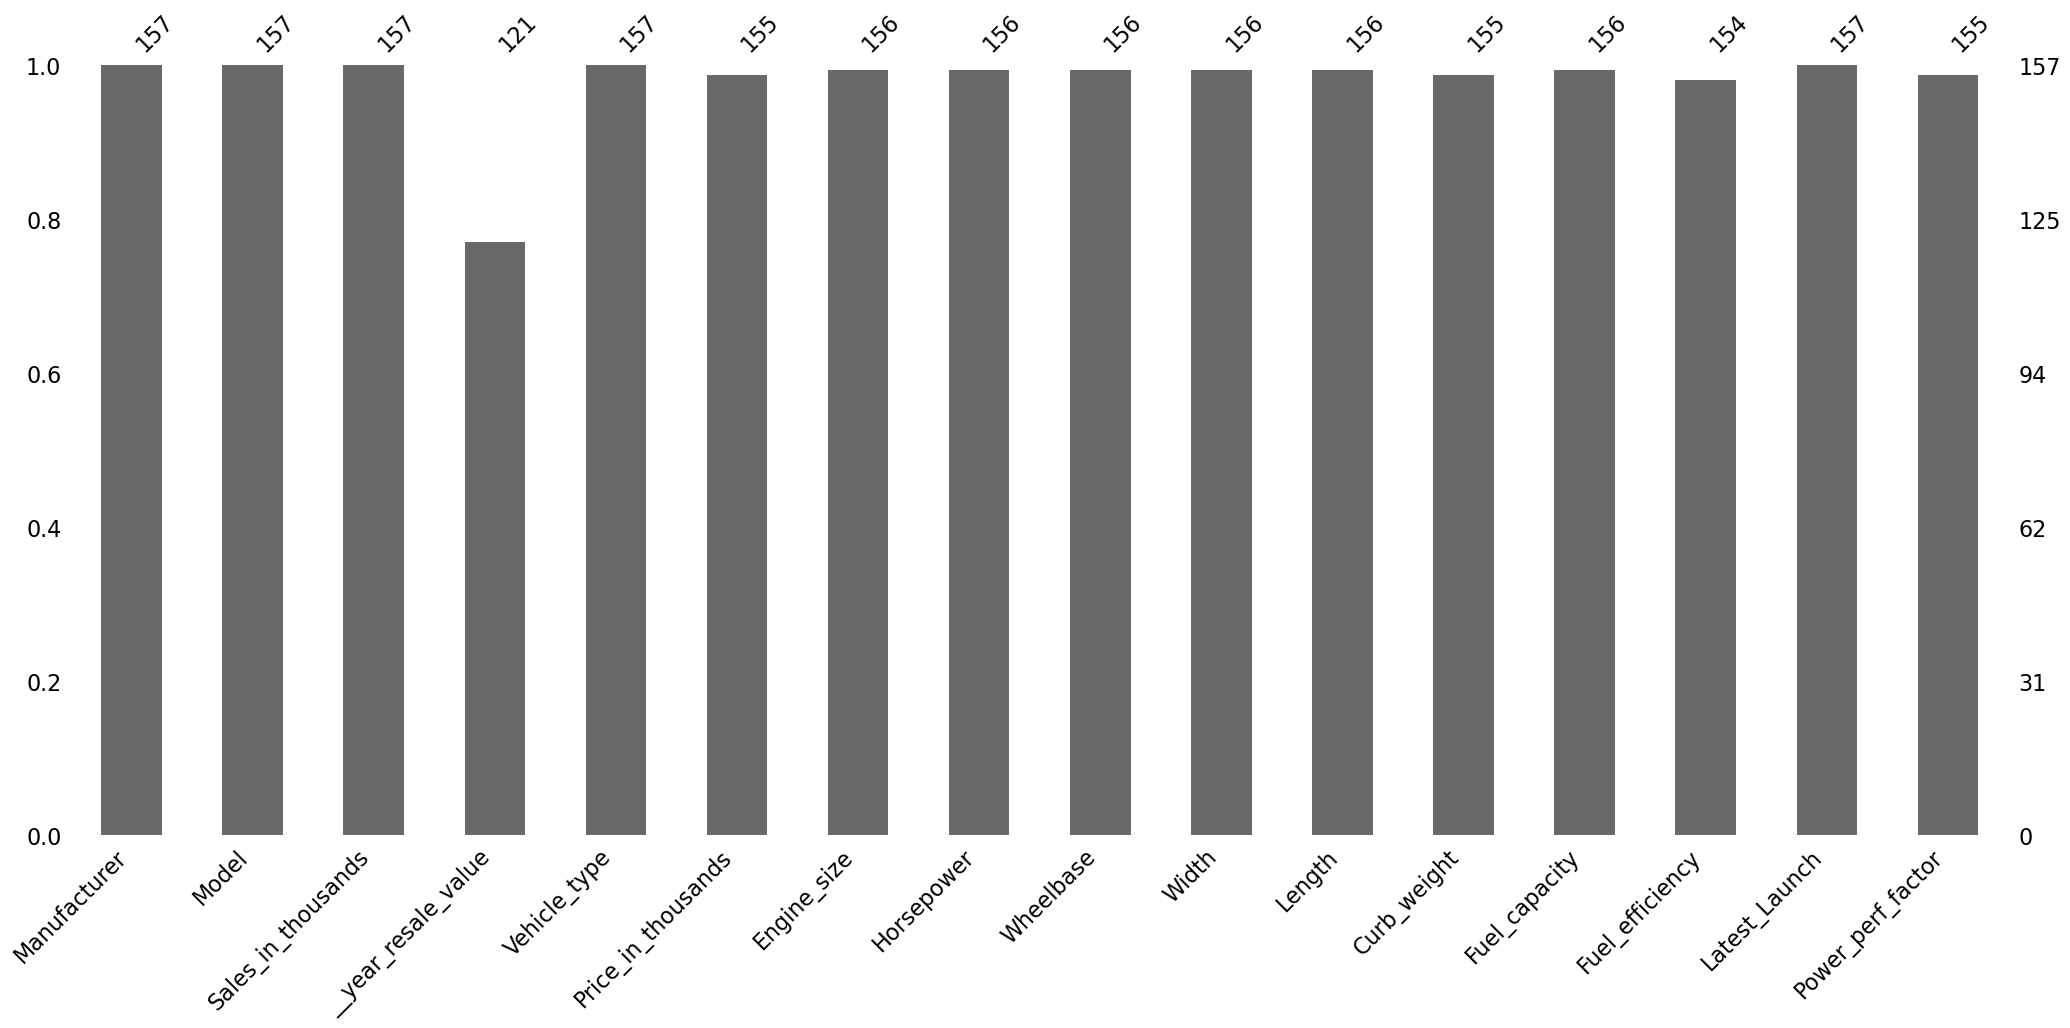

In [11]:
# missing values
print("The column wise missing data is give below")
print(dataset.isnull().sum())
mn.bar(dataset)

In [12]:
# adding a column
manufacturer_count=dataset['Manufacturer'].value_counts()
manufacturer_count

### adding columnMean price per each Manufacturer 

mean_price_manufacturer = dataset[['Manufacturer', 'Price_in_thousands']].groupby('Manufacturer', as_index = False).mean()
mean_price_manufacturer

### Value counts of the column - Vehicle_type

vehicle_count = dataset['Vehicle_type'].value_counts(dropna = False)
vehicle_count

### Mean price per each Vehicle type

mean_price_vehicle = dataset[['Vehicle_type', 'Price_in_thousands']].groupby('Vehicle_type', as_index = False).mean()
mean_price_vehicle

# Value counts of 'Manufacturer'
print("Manufacturer Count:")
print(manufacturer_count)

# Mean price per each Manufacturer
print("\nMean Price per Manufacturer:")
print(mean_price_manufacturer)

# Value counts of the column 'Vehicle_type'
print("\nVehicle Type Count:")
print(vehicle_count)

print("\nVehicle_type:")
print(mean_price_vehicle)


Manufacturer Count:
Manufacturer
Dodge         11
Ford          11
Mercedes-B     9
Toyota         9
Chevrolet      9
Nissan         7
Chrysler       7
Mitsubishi     7
Volvo          6
Oldsmobile     6
Lexus          6
Mercury        6
Pontiac        6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: count, dtype: int64

Mean Price per Manufacturer:
   Manufacturer  Price_in_thousands
0         Acura           30.633333
1          Audi           39.980000
2           BMW           33.096667
3         Buick           26.781250
4      Cadillac           40.254000
5     Chevrolet           20.022778
6      Chrysler           23.430833
7         Dodge           24.213636
8          Ford           21.047273
9         Honda           20.277000
10   

## Ploting Categorical Column

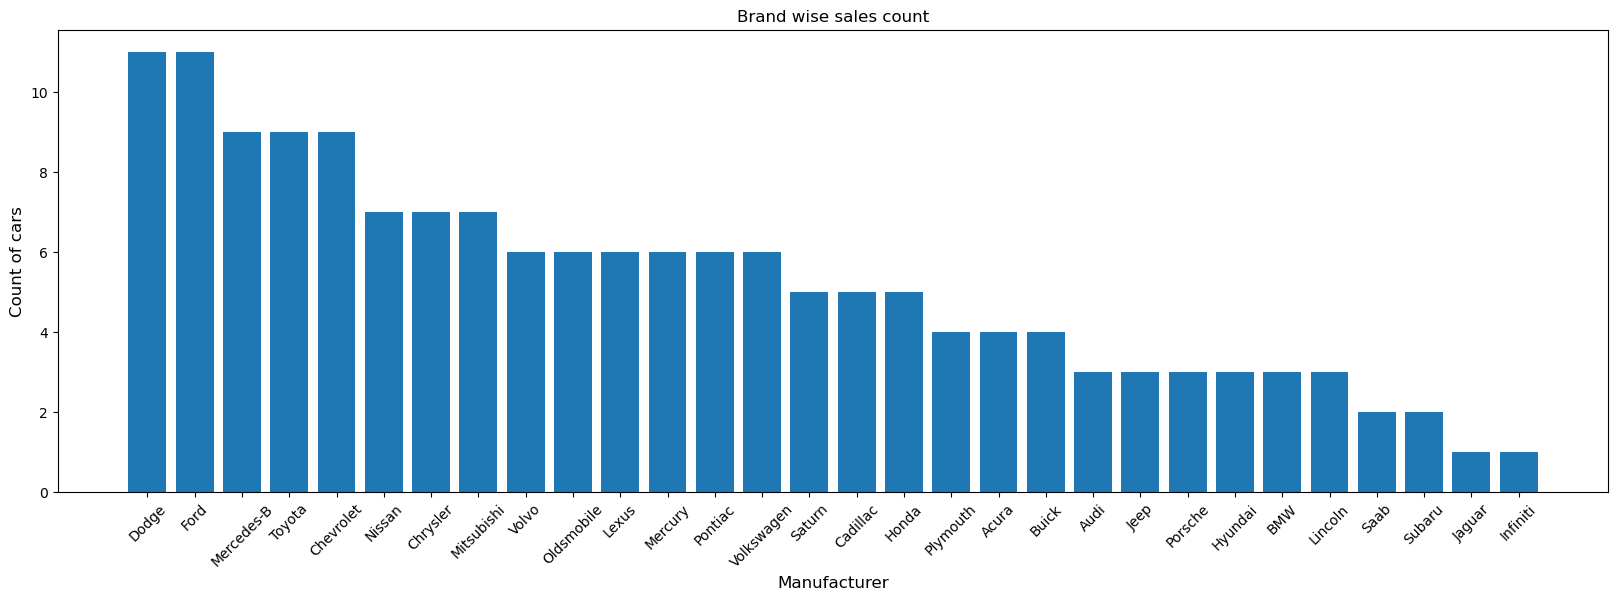

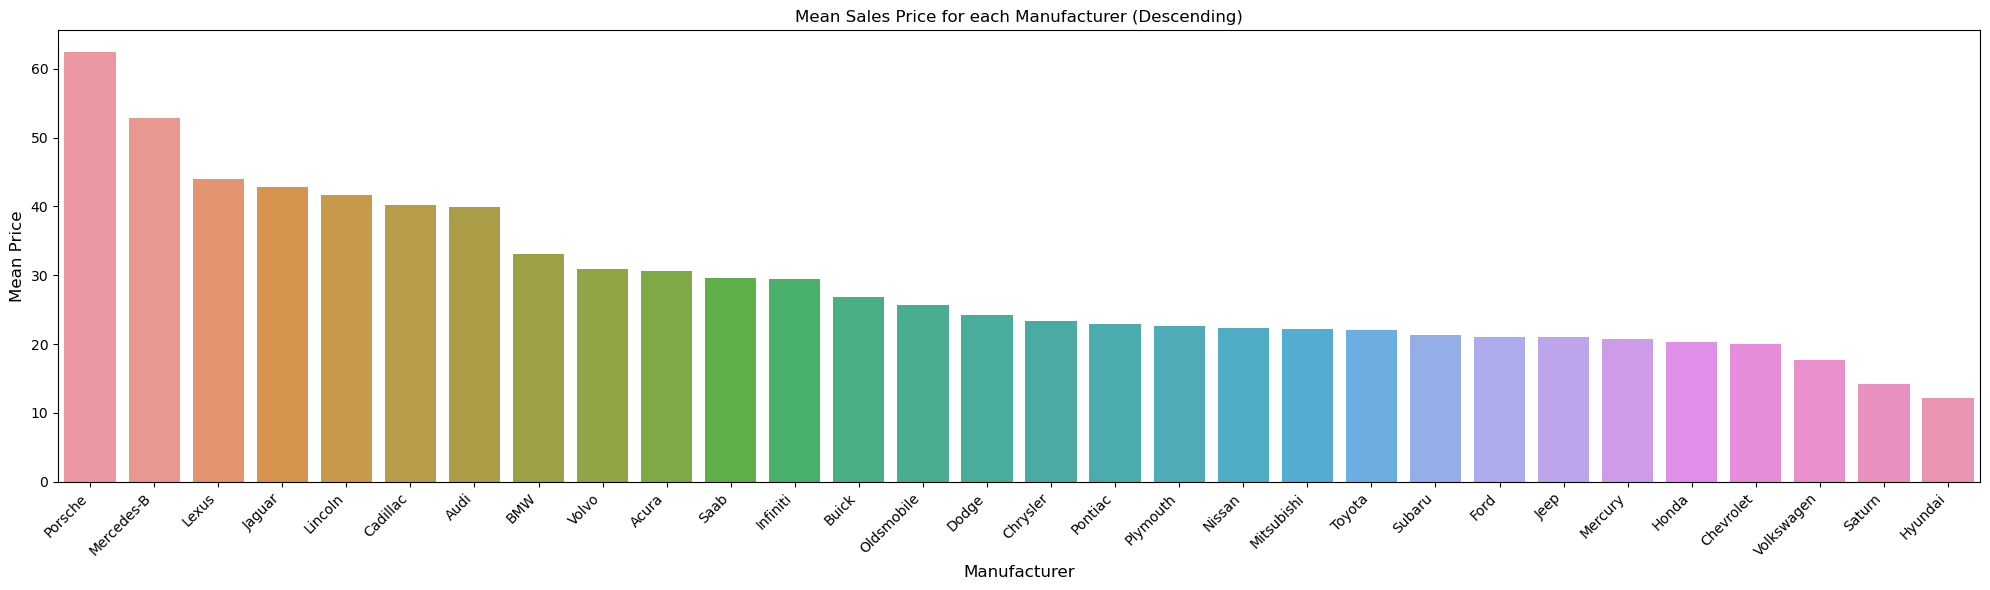

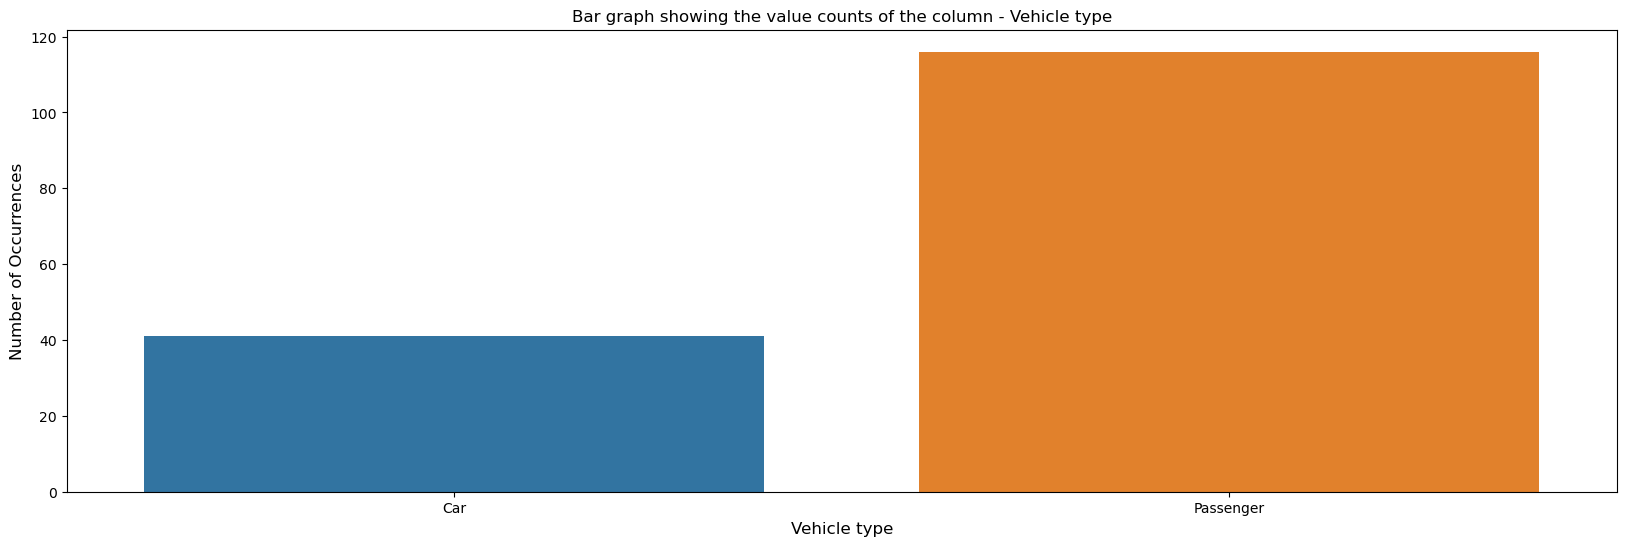

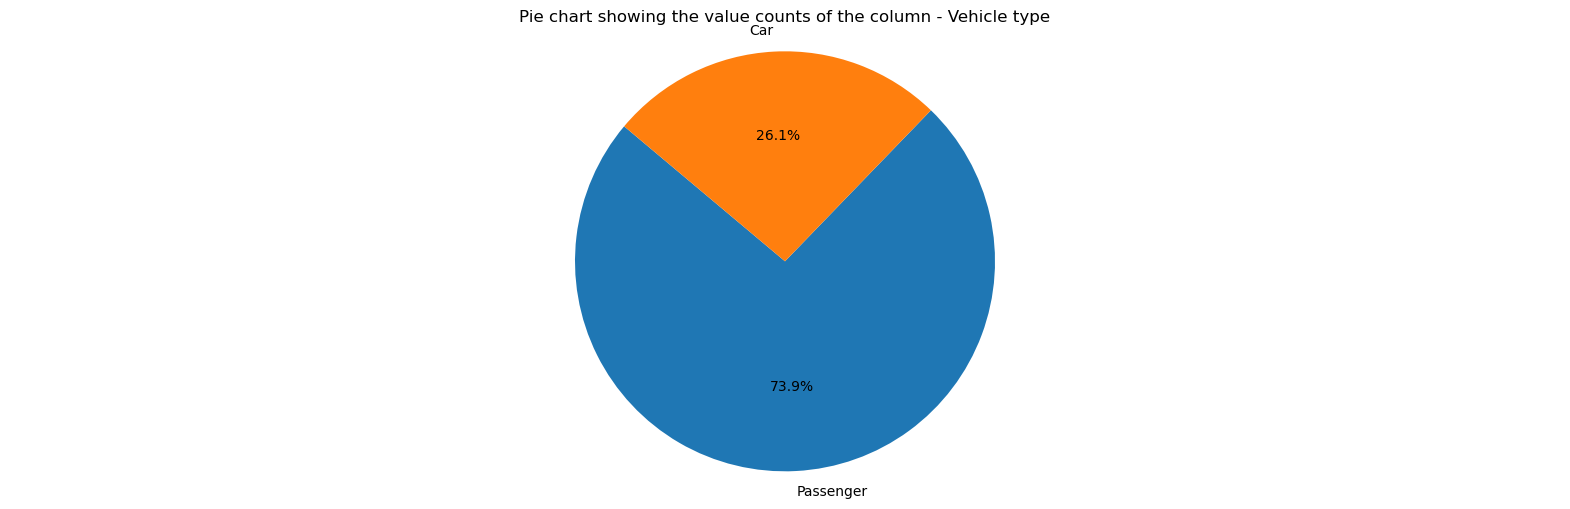

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Sort the DataFrame by mean price in descending order
mean_price_manufacturer_sorted = mean_price_manufacturer.sort_values(by='Price_in_thousands', ascending=False)
# Brand wise sales count
plt.figure(figsize=(20, 6))
plt.bar(manufacturer_count.index, manufacturer_count.values)
plt.title("Brand wise sales count")
plt.ylabel("Count of cars", fontsize=12)
plt.xlabel("Manufacturer", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Mean Sales Price for each Manufacturer (Descending)
plt.figure(figsize=(20, 6))
sns.barplot(data=mean_price_manufacturer_sorted, x='Manufacturer', y='Price_in_thousands', order=mean_price_manufacturer_sorted['Manufacturer'])
plt.title('Mean Sales Price for each Manufacturer (Descending)')
plt.ylabel('Mean Price', fontsize=12)
plt.xlabel('Manufacturer', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Bar graph showing the value counts of the column - Vehicle type
plt.figure(figsize=(20, 6))
sns.barplot(x=vehicle_count.index, y=vehicle_count.values)
plt.title('Bar graph showing the value counts of the column - Vehicle type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Vehicle type', fontsize=12)
plt.show()

# Pie chart showing the value counts of the column - Vehicle type
plt.figure(figsize=(20, 6))
plt.pie(vehicle_count.values, labels=vehicle_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie chart showing the value counts of the column - Vehicle type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### Ploting Numerical Columns

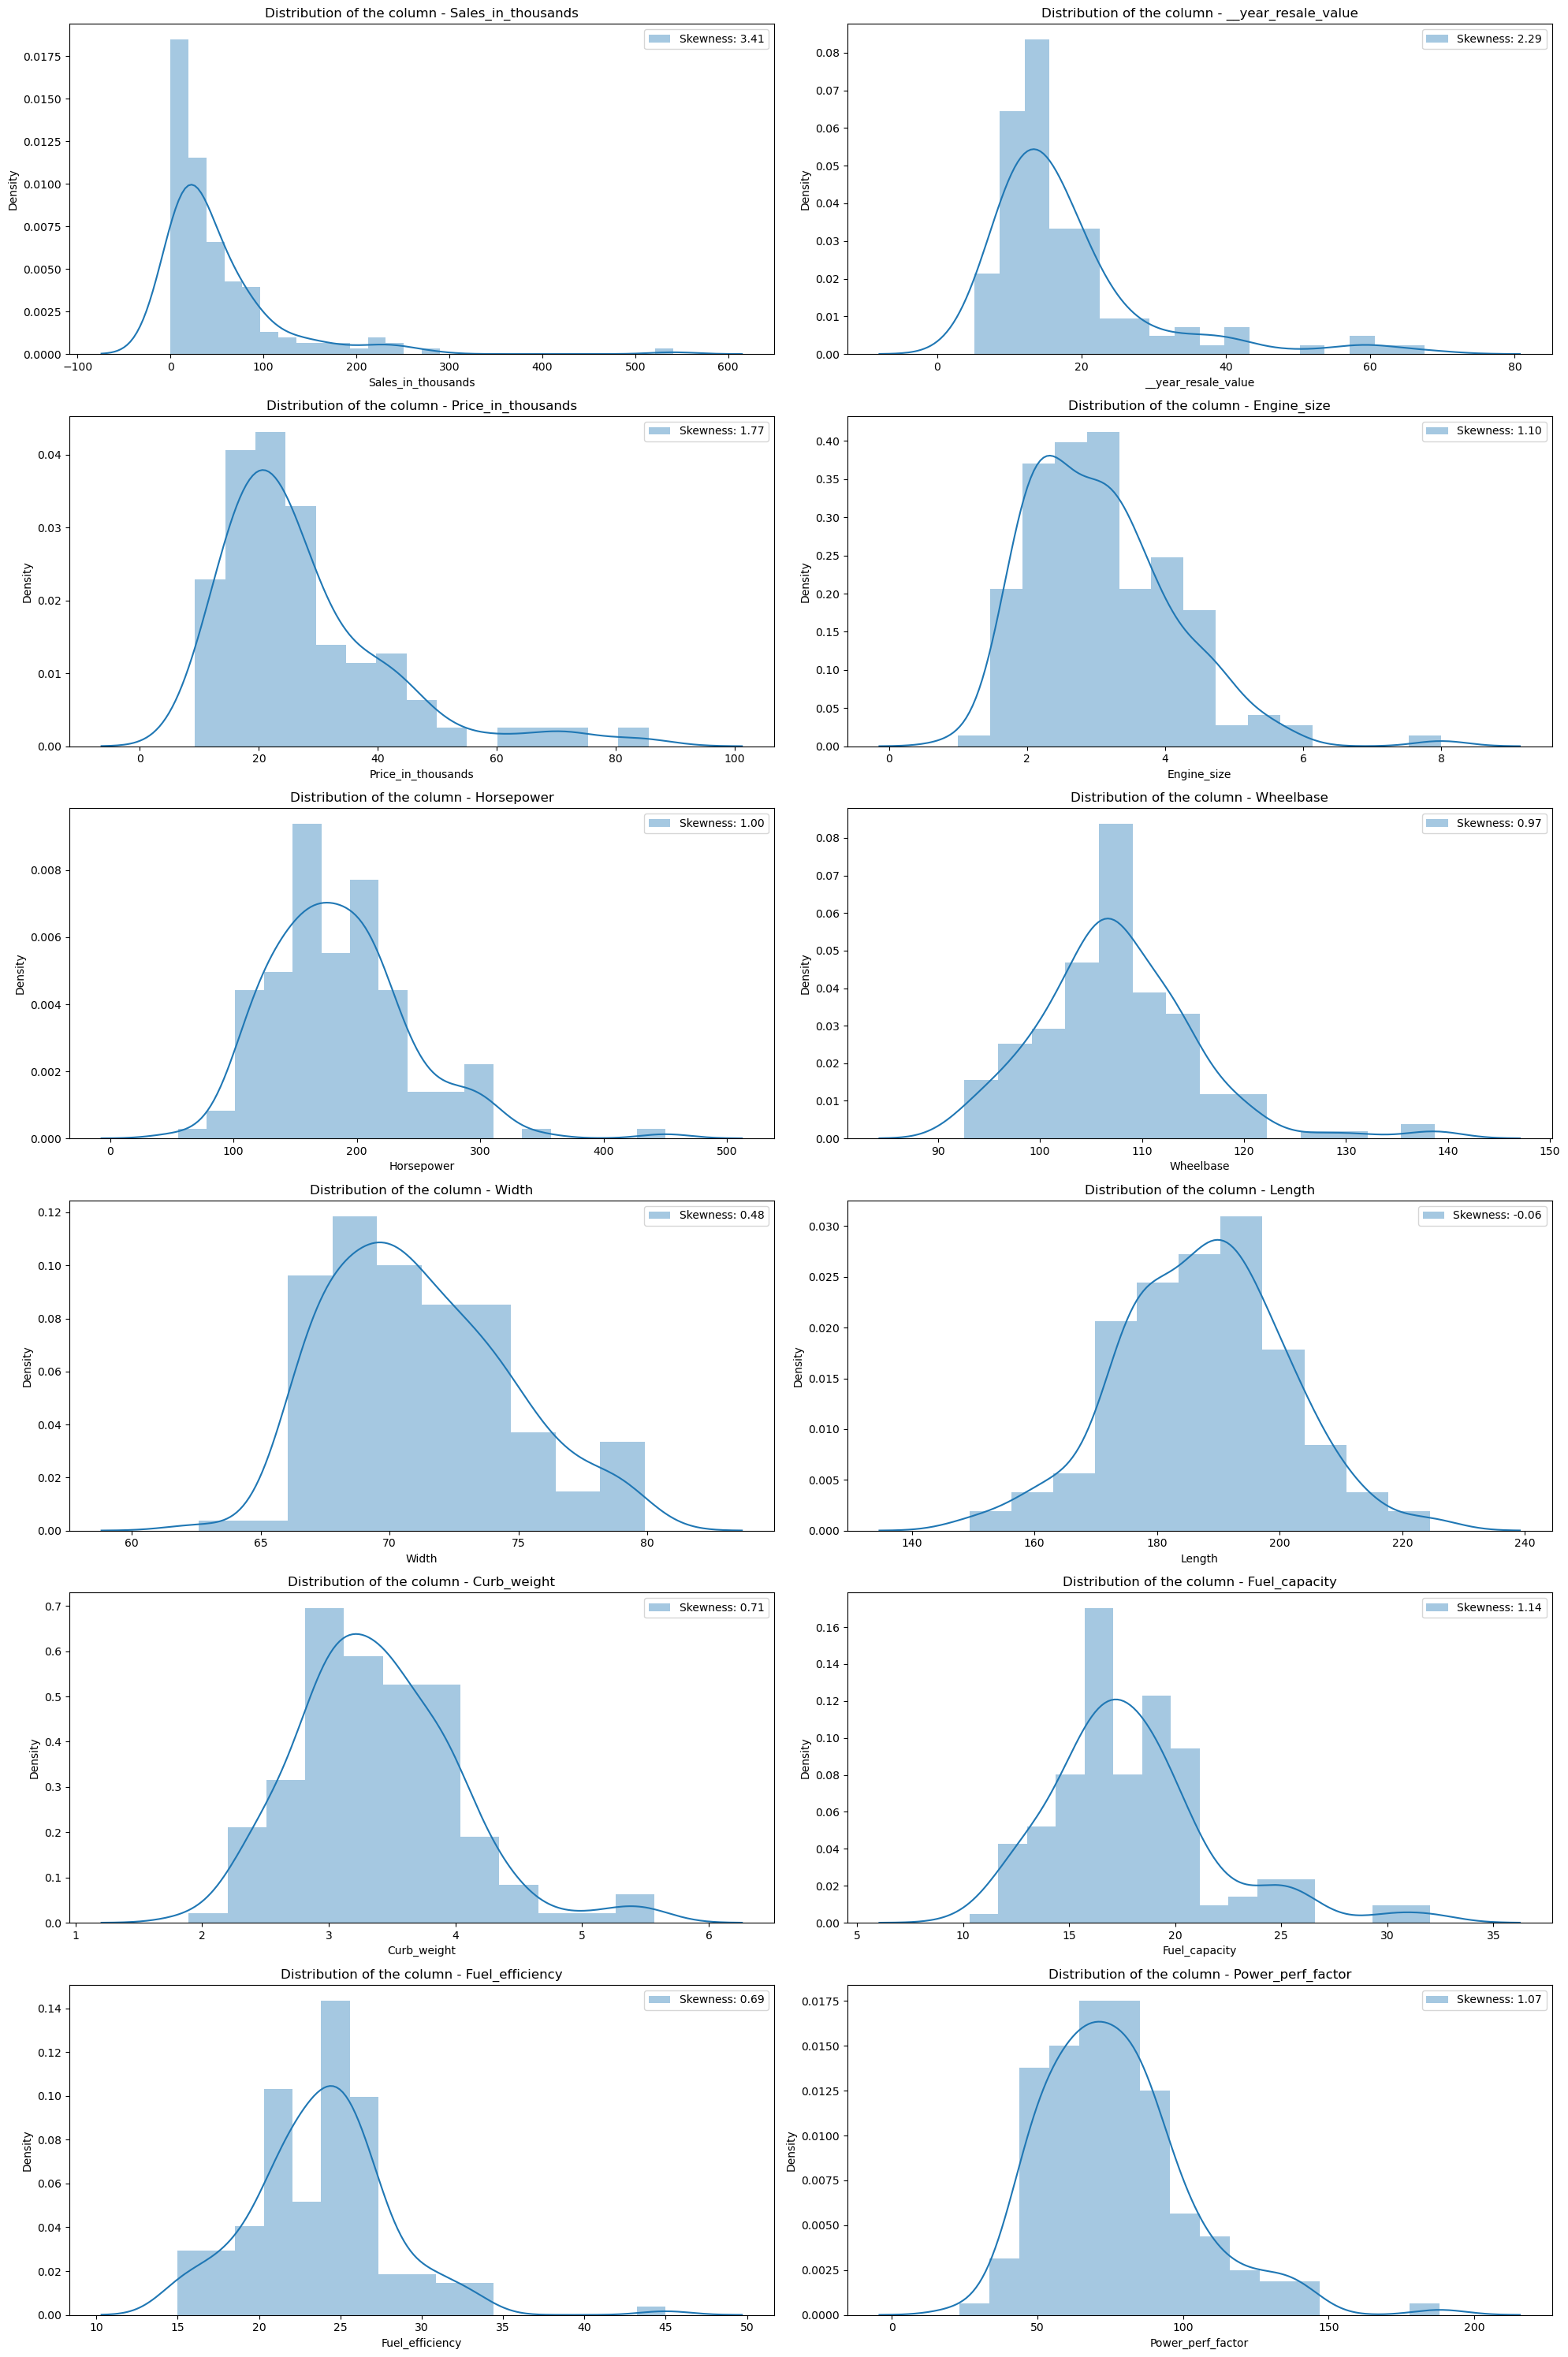

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplots
fig, axes = plt.subplots(6, 2, figsize=(20, 30))

# Flatten the axes for easier indexing
axes = axes.flatten()

# List of columns to plot
columns = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 
           'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 
           'Fuel_efficiency', 'Power_perf_factor']

# Plot each column
for i, col in enumerate(columns):
    sns.distplot(dataset[col], label=f'Skewness: {dataset[col].skew():.2f}', ax=axes[i])
    axes[i].legend(loc='best')
    axes[i].set_title(f'Distribution of the column - {col}')

# Adjust layout
plt.tight_layout()
plt.show()


## Data Preprocessing

In [15]:
def detect_outliers(df, n, features_list):
    outlier_indices = []
    for feature in features_list:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices.extend(df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index)
    return outlier_indices

outliers_to_drop = detect_outliers(dataset, 2, ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 
                                                'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
                                                'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)


We will drop these 66 indices:  [40, 45, 49, 50, 52, 53, 55, 56, 57, 58, 69, 137, 6, 9, 24, 39, 73, 93, 94, 95, 124, 125, 126, 144, 6, 39, 73, 74, 94, 95, 99, 125, 126, 18, 24, 39, 24, 39, 40, 42, 43, 56, 26, 40, 56, 18, 74, 78, 144, 18, 40, 41, 42, 53, 54, 74, 78, 144, 26, 6, 24, 39, 95, 99, 125, 126]


In [16]:
# Drop nulls
modified_dataset=dataset.dropna(axis=0)

In [17]:
modified_dataset.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [18]:
# check duplicates
modified_dataset.duplicated().sum()

0

In [19]:
### Dropping the columns - Model
modified_dataset.drop(['Model'], axis = 1, inplace = True)
modified_dataset

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,1/24/2011,46.943877
146,Volkswagen,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,8/27/2011,47.638237
147,Volkswagen,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381
148,Volkswagen,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,5/31/2011,48.907372


## classifing the cars based on price below or above 30 thousand dollars

In [20]:
### Seperating the Manufacturers into class 1 and 2

class_1 = []
class_2 = []

for index in range(len(mean_price_manufacturer)):
    if mean_price_manufacturer.iloc[index, 1] <= 30:
        class_1.append(mean_price_manufacturer.iloc[index, 0])
    else:
        class_2.append(mean_price_manufacturer.iloc[index, 0])
        
print('Manufacturers with less than 30 mean price: ', class_1)
print('Manufacturers with more than 30 mean price: ', class_2)

Manufacturers with less than 30 mean price:  ['Buick', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti', 'Jeep', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen']
Manufacturers with more than 30 mean price:  ['Acura', 'Audi', 'BMW', 'Cadillac', 'Jaguar', 'Lexus', 'Lincoln', 'Mercedes-B', 'Porsche', 'Volvo']


In [21]:
### Modifying the Manufacturer column in the dataset

manufacturer_data = modified_dataset['Manufacturer']
new_manufacturer_data = []

for value in manufacturer_data:
    if value in class_1:
        new_manufacturer_data.append(1)
    else:
        new_manufacturer_data.append(2)
        
modified_dataset['Manufacturer'] = new_manufacturer_data

In [22]:
### Looking at the modified dataset

modified_dataset

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,2,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,2,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,2,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,2,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,2,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,1/24/2011,46.943877
146,1,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,8/27/2011,47.638237
147,1,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381
148,1,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,5/31/2011,48.907372


# Age of the cars

In [23]:
### Creating the Age data

age_data = []
launch_data = modified_dataset['Latest_Launch']

for value in launch_data:
    year = int(value.split('/')[-1])
    age_data.append(2022 - year)

### Adding the Age column

modified_dataset['Age'] = age_data
modified_dataset

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Age
0,2,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,10
1,2,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,11
3,2,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,11
4,2,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,11
5,2,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,1/24/2011,46.943877,11
146,1,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,8/27/2011,47.638237,11
147,1,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381,10
148,1,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,5/31/2011,48.907372,11


Text(0.5, 1.0, 'Distribution of the column - Age')

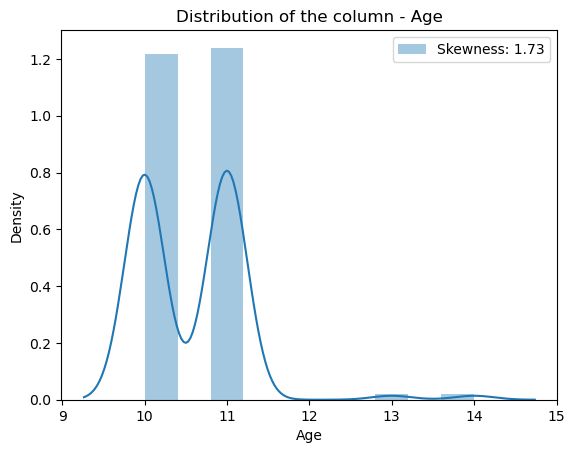

In [24]:
### Understanding the distribution of the column - Age

sns.distplot(modified_dataset['Age'], label = 'Skewness: %.2f'%(modified_dataset['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Age')

In [25]:
# droping the launch column
modified_dataset.drop(['Latest_Launch'], axis = 1, inplace = True)

In [26]:
# data after feature engineering
modified_dataset

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age
0,2,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,10
1,2,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,11
3,2,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,11
4,2,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,11
5,2,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,46.943877,11
146,1,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,47.638237,11
147,1,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,61.701381,10
148,1,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,48.907372,11


## Data Transformation

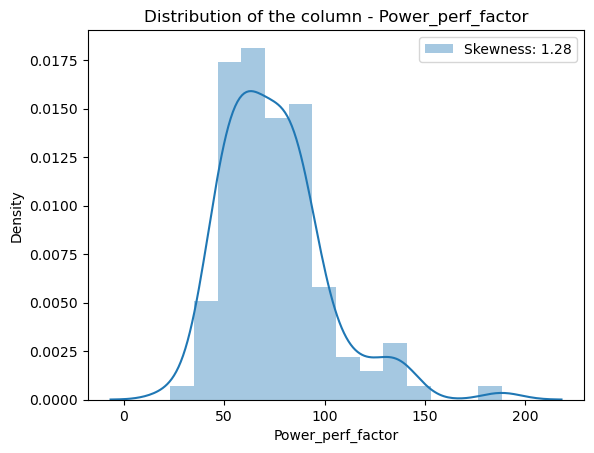

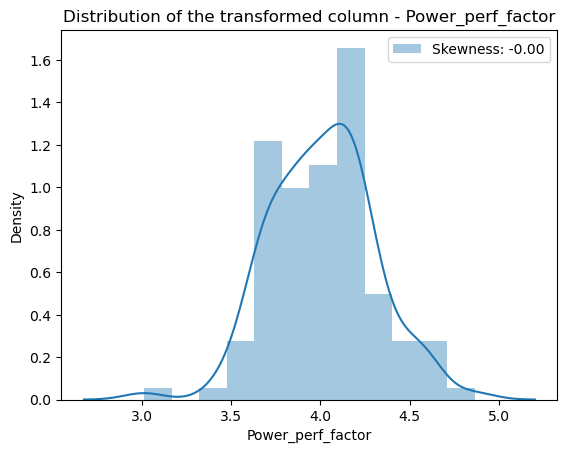

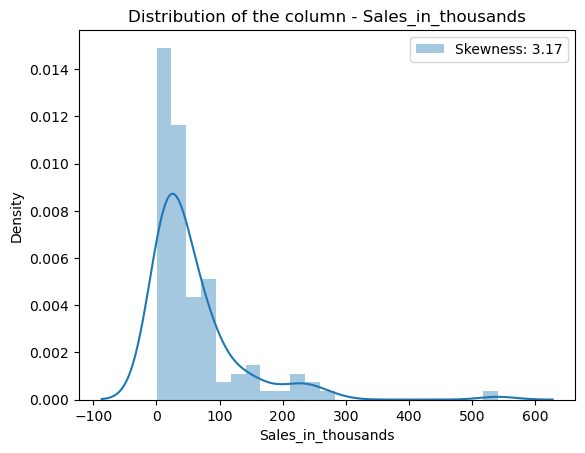

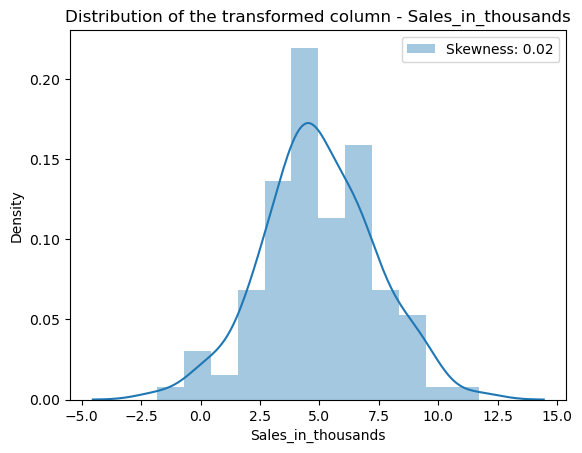

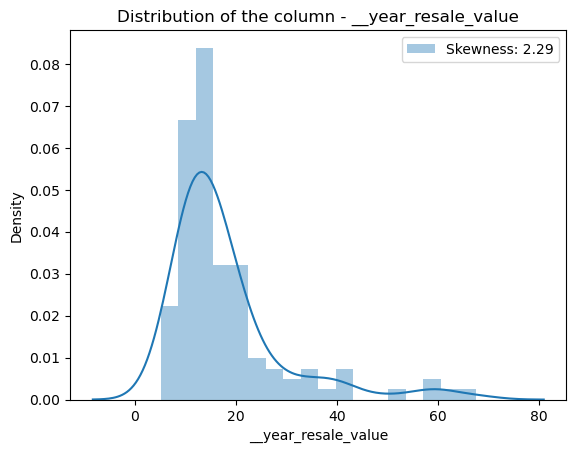

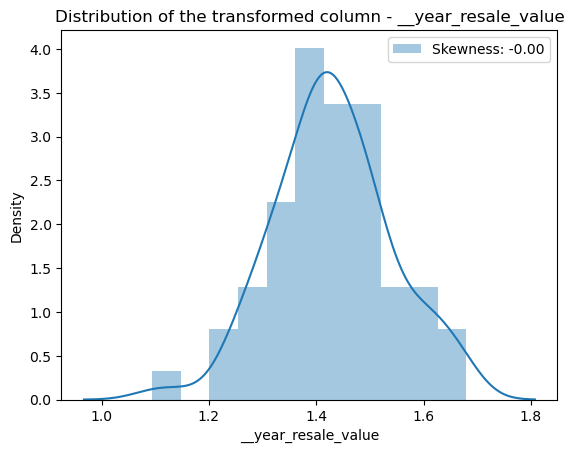

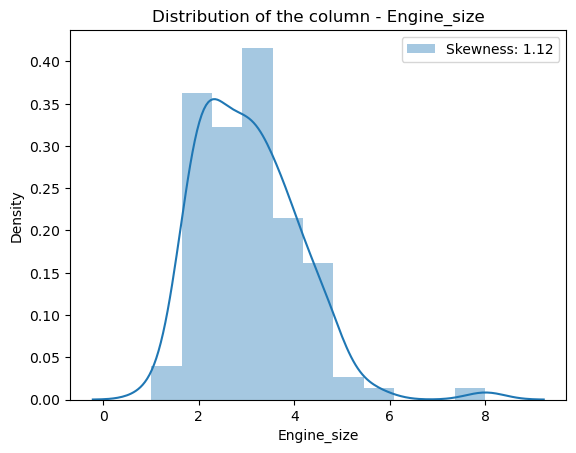

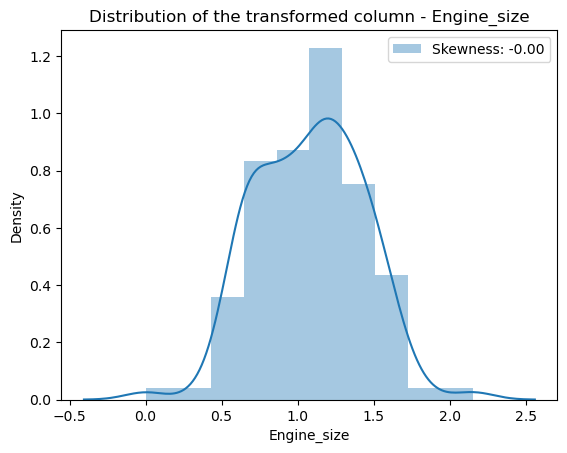

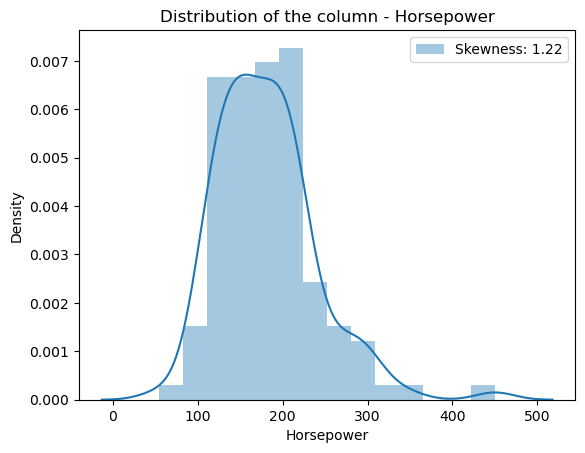

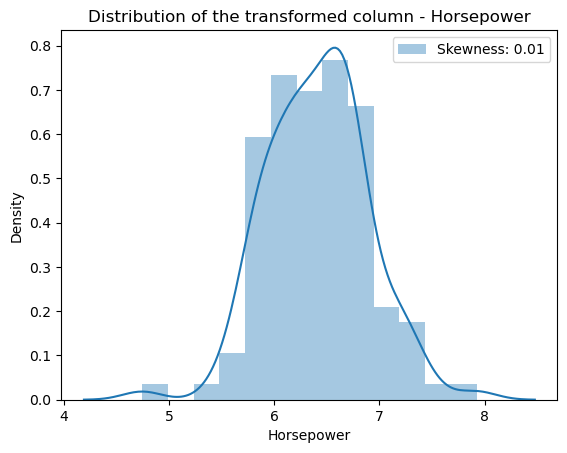

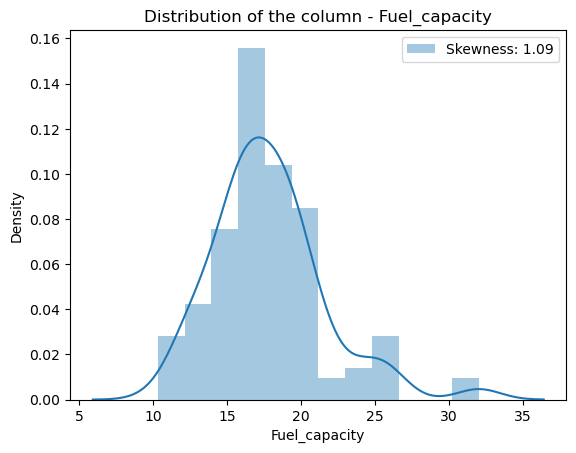

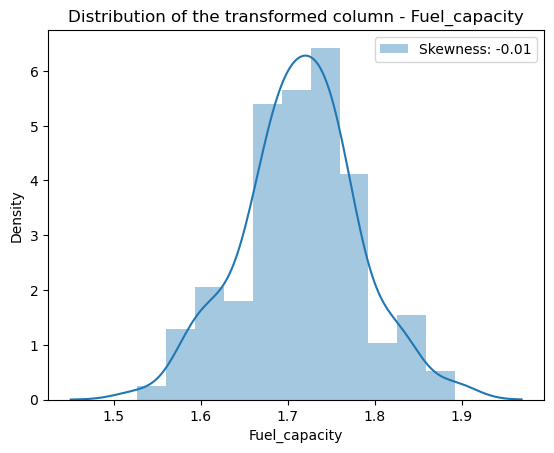

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def analyze_column_distribution(dataset, column_name):
    # Plot the distribution of the original data
    sns.distplot(dataset[column_name], label=f'Skewness: {dataset[column_name].skew():.2f}')
    plt.legend(loc='best')
    plt.title(f'Distribution of the column - {column_name}')
    plt.show()
    
    # Apply Box-Cox transformation to the data
    modified_data, _ = stats.boxcox(dataset[column_name])
    dataset[column_name] = modified_data
    
    # Plot the distribution of the transformed data
    sns.distplot(dataset[column_name], label=f'Skewness: {dataset[column_name].skew():.2f}')
    plt.legend(loc='best')
    plt.title(f'Distribution of the transformed column - {column_name}')
    plt.show()

# List of columns to analyze
columns_to_analyze = ['Power_perf_factor', 'Sales_in_thousands', '__year_resale_value', 'Engine_size', 'Horsepower', 'Fuel_capacity']

# Iterate through each column and analyze its distribution
for column in columns_to_analyze:
    analyze_column_distribution(modified_dataset, column)


#  Normalaization


In [28]:
### A function to normalize numerical columns

def normalize_columns(dataframe, column):
    data = dataframe[column]
    mini = min(data)
    maxi = max(data)
    
    new_data = []
    for value in data:
        new_data.append((value - mini)/(maxi - mini))
    
    dataframe[column] = new_data

numerical_columns = ['Sales_in_thousands', '__year_resale_value', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
                    'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor', 'Age']
for each_column in numerical_columns:
    normalize_columns(modified_dataset, each_column)

In [29]:
### Looking at the sample records of the modified dataset

modified_dataset

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age
0,2,0.407027,0.615374,Passenger,21.50,0.275559,0.423363,0.186551,0.281437,0.306258,0.231056,0.258390,0.433333,0.446518,0.00
1,2,0.519428,0.686791,Passenger,28.40,0.550662,0.651061,0.336226,0.461078,0.579228,0.503727,0.507680,0.333333,0.661065,0.25
3,2,0.328451,0.812993,Passenger,42.00,0.593994,0.617399,0.477223,0.526946,0.628495,0.607143,0.547948,0.233333,0.661164,0.25
4,2,0.430440,0.725022,Passenger,23.99,0.275559,0.455927,0.216920,0.335329,0.380826,0.342547,0.464715,0.400000,0.482176,0.25
5,2,0.419998,0.743362,Passenger,33.95,0.486337,0.593708,0.349241,0.808383,0.567244,0.517391,0.571871,0.233333,0.624328,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,0.342559,0.462560,Passenger,14.90,0.325535,0.331520,0.136659,0.341317,0.185087,0.270807,0.349839,0.366667,0.342331,0.25
146,1,0.635331,0.528862,Passenger,16.70,0.325535,0.331520,0.136659,0.341317,0.304927,0.297516,0.349839,0.366667,0.349424,0.25
147,1,0.557686,0.623847,Passenger,21.20,0.275559,0.455927,0.299349,0.353293,0.462051,0.356522,0.464715,0.400000,0.473888,0.00
148,1,0.340349,0.620399,Passenger,19.99,0.325535,0.331520,0.104121,0.245509,0.146471,0.367702,0.294991,0.366667,0.362117,0.25


## Feature Encoding

In [30]:
### One Hot Encoding the columns - Manufacturer, Vehicle_type of the modified dataset

encoded_dataset = pd.get_dummies(data = modified_dataset, columns = ['Manufacturer', 'Vehicle_type'])
encoded_dataset

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Manufacturer_1,Manufacturer_2,Vehicle_type_Car,Vehicle_type_Passenger
0,0.407027,0.615374,21.50,0.275559,0.423363,0.186551,0.281437,0.306258,0.231056,0.258390,0.433333,0.446518,0.00,False,True,False,True
1,0.519428,0.686791,28.40,0.550662,0.651061,0.336226,0.461078,0.579228,0.503727,0.507680,0.333333,0.661065,0.25,False,True,False,True
3,0.328451,0.812993,42.00,0.593994,0.617399,0.477223,0.526946,0.628495,0.607143,0.547948,0.233333,0.661164,0.25,False,True,False,True
4,0.430440,0.725022,23.99,0.275559,0.455927,0.216920,0.335329,0.380826,0.342547,0.464715,0.400000,0.482176,0.25,False,True,False,True
5,0.419998,0.743362,33.95,0.486337,0.593708,0.349241,0.808383,0.567244,0.517391,0.571871,0.233333,0.624328,0.25,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.342559,0.462560,14.90,0.325535,0.331520,0.136659,0.341317,0.185087,0.270807,0.349839,0.366667,0.342331,0.25,True,False,False,True
146,0.635331,0.528862,16.70,0.325535,0.331520,0.136659,0.341317,0.304927,0.297516,0.349839,0.366667,0.349424,0.25,True,False,False,True
147,0.557686,0.623847,21.20,0.275559,0.455927,0.299349,0.353293,0.462051,0.356522,0.464715,0.400000,0.473888,0.00,True,False,False,True
148,0.340349,0.620399,19.99,0.325535,0.331520,0.104121,0.245509,0.146471,0.367702,0.294991,0.366667,0.362117,0.25,True,False,False,True


In [31]:
### Create the column - Target using Price_in_thousands

target_data = encoded_dataset['Price_in_thousands']
encoded_dataset['Target'] = target_data

### Dropping the column - Price_in_thousands

encoded_dataset.drop(['Price_in_thousands'], axis = 1, inplace = True)
encoded_dataset

,Sales_in_thousands,__year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Manufacturer_1,Manufacturer_2,Vehicle_type_Car,Vehicle_type_Passenger,Target
0,0.407027,0.615374,0.275559,0.423363,0.186551,0.281437,0.306258,0.231056,0.258390,0.433333,0.446518,0.00,False,True,False,True,21.50
1,0.519428,0.686791,0.550662,0.651061,0.336226,0.461078,0.579228,0.503727,0.507680,0.333333,0.661065,0.25,False,True,False,True,28.40
3,0.328451,0.812993,0.593994,0.617399,0.477223,0.526946,0.628495,0.607143,0.547948,0.233333,0.661164,0.25,False,True,False,True,42.00
4,0.430440,0.725022,0.275559,0.455927,0.216920,0.335329,0.380826,0.342547,0.464715,0.400000,0.482176,0.25,False,True,False,True,23.99
5,0.419998,0.743362,0.486337,0.593708,0.349241,0.808383,0.567244,0.517391,0.571871,0.233333,0.624328,0.25,False,True,False,True,33.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.342559,0.462560,0.325535,0.331520,0.136659,0.341317,0.185087,0.270807,0.349839,0.366667,0.342331,0.25,True,False,False,True,14.90
146,0.635331,0.528862,0.325535,0.331520,0.136659,0.341317,0.304927,0.297516,0.349839,0.366667,0.349424,0.25,True,False,False,True,16.70
147,0.557686,0.623847,0.275559,0.455927,0.299349,0.353293,0.462051,0.356522,0.464715,0.400000,0.473888,0.00,True,False,False,True,21.20
148,0.340349,0.620399,0.325535,0.331520,0.104121,0.245509,0.146471,0.367702,0.294991,0.366667,0.362117,0.25,True,False,False,True,19.99


## feature selection

In [32]:
### Creating a filter_dataset

filter_dataset = encoded_dataset[['Sales_in_thousands', '__year_resale_value', 'Engine_size', 'Horsepower', 'Wheelbase', 
                                  'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
                                  'Age']]
filter_dataset

,Sales_in_thousands,__year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age
0,0.407027,0.615374,0.275559,0.423363,0.186551,0.281437,0.306258,0.231056,0.258390,0.433333,0.446518,0.00
1,0.519428,0.686791,0.550662,0.651061,0.336226,0.461078,0.579228,0.503727,0.507680,0.333333,0.661065,0.25
3,0.328451,0.812993,0.593994,0.617399,0.477223,0.526946,0.628495,0.607143,0.547948,0.233333,0.661164,0.25
4,0.430440,0.725022,0.275559,0.455927,0.216920,0.335329,0.380826,0.342547,0.464715,0.400000,0.482176,0.25
5,0.419998,0.743362,0.486337,0.593708,0.349241,0.808383,0.567244,0.517391,0.571871,0.233333,0.624328,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.342559,0.462560,0.325535,0.331520,0.136659,0.341317,0.185087,0.270807,0.349839,0.366667,0.342331,0.25
146,0.635331,0.528862,0.325535,0.331520,0.136659,0.341317,0.304927,0.297516,0.349839,0.366667,0.349424,0.25
147,0.557686,0.623847,0.275559,0.455927,0.299349,0.353293,0.462051,0.356522,0.464715,0.400000,0.473888,0.00
148,0.340349,0.620399,0.325535,0.331520,0.104121,0.245509,0.146471,0.367702,0.294991,0.366667,0.362117,0.25


Text(0.5, 1.0, 'Correlation Heatmap')

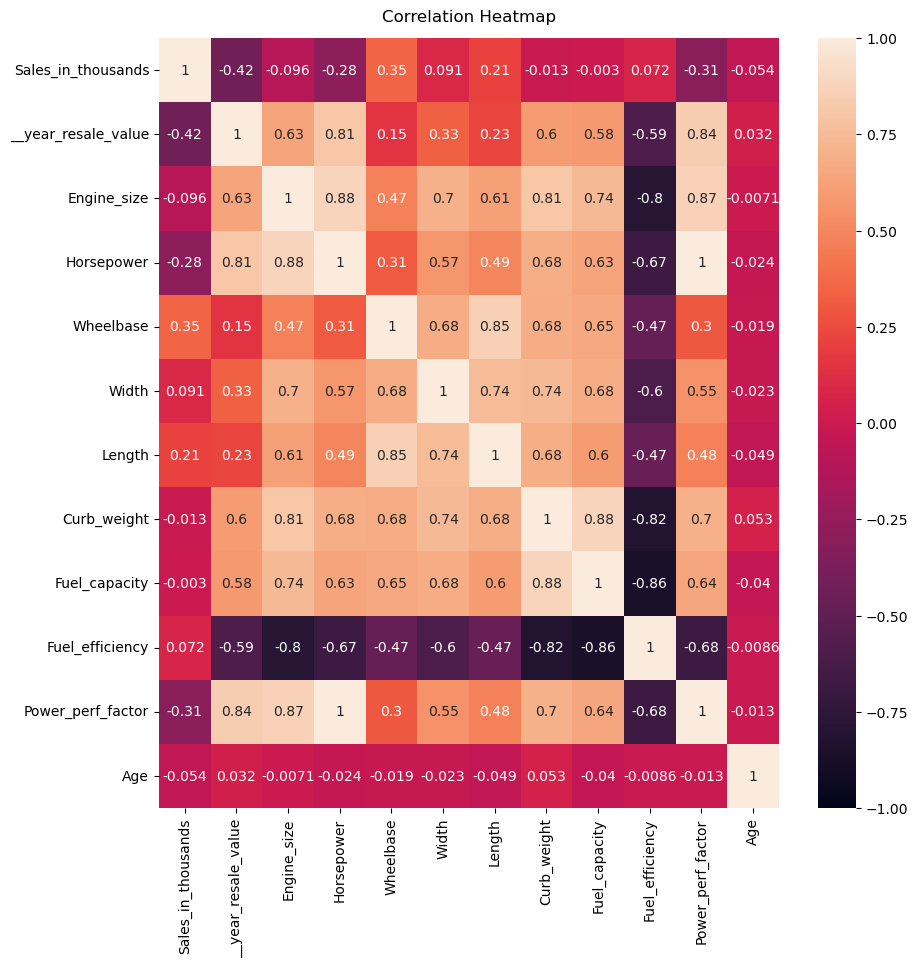

In [33]:
### Plotting the correlation between various columns of the filter_dataset

plt.figure(figsize = (10, 10))
heatmap = sns.heatmap(filter_dataset.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize' : 12}, pad = 12)

In [34]:
### Detecting the columns that cause multicollinearity using VIF

column_names = list(filter_dataset.columns)

for name in column_names:
    if len(column_names) >= 2:
        Y = filter_dataset.loc[:, filter_dataset.columns == name]
        X = filter_dataset.loc[:, filter_dataset.columns != name]
        X = sm.add_constant(X)
        linear_model = sm.OLS(Y, X)
        results = linear_model.fit()
        r_squared = results.rsquared
        vif_value = round(1/(1 - r_squared), 2)
        print("Column: {} and VIF: {}".format(name, vif_value))
        
        if vif_value > 10:
            filter_dataset = filter_dataset.drop([name], axis = 1)
            column_names.remove(name)

Column: Sales_in_thousands and VIF: 1.61
Column: __year_resale_value and VIF: 8.64
Column: Engine_size and VIF: 10.08
Column: Wheelbase and VIF: 6.06
Column: Width and VIF: 3.15
Column: Length and VIF: 6.08
Column: Curb_weight and VIF: 8.42
Column: Fuel_capacity and VIF: 7.56
Column: Fuel_efficiency and VIF: 5.08
Column: Power_perf_factor and VIF: 422.54


## Modeling

In [35]:
### Splitting the dataset to the matrices X and Y
X = encoded_dataset.iloc[:, : -1].values
Y = encoded_dataset.iloc[:, -1].values

In [36]:
### Dividing the dataset into train and test in the ratio of 80 : 20

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 27, shuffle = True)

Multi Linear Regression:
Train RMSE: 3.9560521269589155
Test RMSE: 3.814855335847521
Train R-squared: 0.9296662838103147
Test R-squared: 0.8581384589265274
---------------------
Lasso Regression:
Train RMSE: 3.984936600303928
Test RMSE: 3.781344594729767
Train R-squared: 0.9286354738966979
Test R-squared: 0.8606198141763819
---------------------
Ridge Regression:
Train RMSE: 3.9560521269936455
Test RMSE: 3.814853655098435
Train R-squared: 0.9296662838090798
Test R-squared: 0.8581385839292244
---------------------
Support Vector Regression:
Train RMSE: 11.281698577616988
Test RMSE: 6.920909044384208
Train R-squared: 0.42800986584770195
Test R-squared: 0.5330882431704301
---------------------
Decision Tree Regression:
Train RMSE: 0.0
Test RMSE: 4.9416501081791155
Train R-squared: 1.0
Test R-squared: 0.7619585920500872
---------------------
Random Forest Regression:
Train RMSE: 1.330575435042164
Test RMSE: 3.362159929019465
Train R-squared: 0.9920435643197059
Test R-squared: 0.88980921884

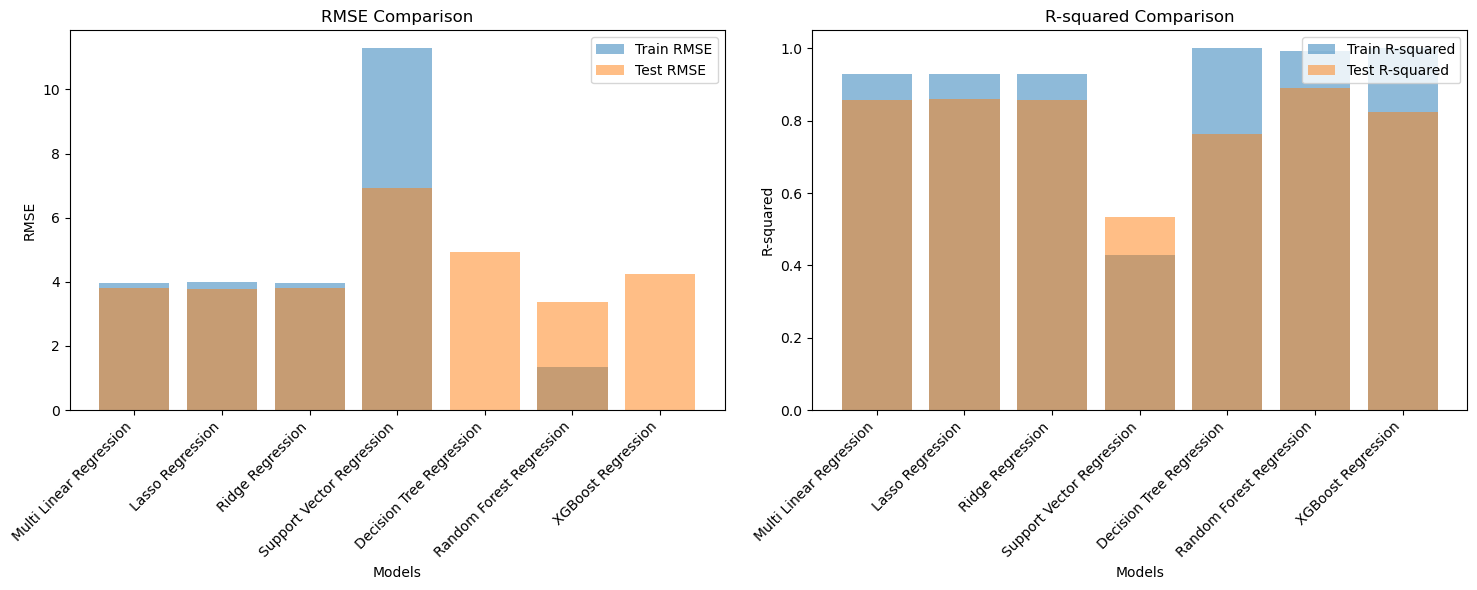

,Model,RMSE_train,RMSE_test,R-squared_train,R-squared_test
0,Multi Linear Regression,3.956052,3.814855,0.929666,0.858138
1,Lasso Regression,3.984937,3.781345,0.928635,0.860620
2,Ridge Regression,3.956052,3.814854,0.929666,0.858139
3,Support Vector Regression,11.281699,6.920909,0.428010,0.533088
4,Decision Tree Regression,0.000000,4.941650,1.000000,0.761959
5,Random Forest Regression,1.330575,3.362160,0.992044,0.889809
6,XGBoost Regression,0.000723,4.254900,1.000000,0.823523


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xg

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# Function to calculate R-squared
def calculate_r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

# Function to train and evaluate regression models
def train_evaluate_models(X_train, X_test, Y_train, Y_test):
    models = {
        "Multi Linear Regression": LinearRegression(),
        "Lasso Regression": GridSearchCV(Lasso(), {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 0.1, 0.5, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}, scoring='neg_mean_squared_error', cv=5),
        "Ridge Regression": GridSearchCV(Ridge(), {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 0.1, 0.5, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}, scoring='neg_mean_squared_error', cv=5),
        "Support Vector Regression": SVR(kernel='rbf'),
        "Decision Tree Regression": DecisionTreeRegressor(),
        "Random Forest Regression": GridSearchCV(RandomForestRegressor(), {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30]}, scoring='neg_mean_squared_error', cv=5),
        "XGBoost Regression": xg.XGBRegressor(objective ='reg:squarederror', n_estimators=100, seed=27)
    }

    model_metrics = []

    for name, model in models.items():
        if isinstance(model, GridSearchCV):
            model.fit(X_train, Y_train)
            best_model = model.best_estimator_
            Y_pred_train = best_model.predict(X_train)
            Y_pred_test = best_model.predict(X_test)
        else:
            model.fit(X_train, Y_train)
            Y_pred_train = model.predict(X_train)
            Y_pred_test = model.predict(X_test)
        
        rmse_train = calculate_rmse(Y_train, Y_pred_train)
        r2_train = calculate_r2(Y_train, Y_pred_train)
        rmse_test = calculate_rmse(Y_test, Y_pred_test)
        r2_test = calculate_r2(Y_test, Y_pred_test)
        
        model_metrics.append({
            'Model': name,
            'RMSE_train': rmse_train,
            'RMSE_test': rmse_test,
            'R-squared_train': r2_train,
            'R-squared_test': r2_test,
        })

        print(f"{name}:")
        print("Train RMSE:", rmse_train)
        print("Test RMSE:", rmse_test)
        print("Train R-squared:", r2_train)
        print("Test R-squared:", r2_test)
        print("---------------------")

    return pd.DataFrame(model_metrics)

# Train and evaluate models
results_df = train_evaluate_models(X_train, X_test, Y_train, Y_test)

# Plot RMSE and R-squared comparison
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# RMSE comparison
axes[0].bar(results_df['Model'], results_df['RMSE_train'], alpha=0.5, label='Train RMSE')
axes[0].bar(results_df['Model'], results_df['RMSE_test'], alpha=0.5, label='Test RMSE')
axes[0].set_title('RMSE Comparison')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('RMSE')
axes[0].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[0].legend()

# R-squared comparison
axes[1].bar(results_df['Model'], results_df['R-squared_train'], alpha=0.5, label='Train R-squared')
axes[1].bar(results_df['Model'], results_df['R-squared_test'], alpha=0.5, label='Test R-squared')
axes[1].set_title('R-squared Comparison')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('R-squared')
axes[1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[1].legend()

plt.tight_layout()
plt.show()

# Display results DataFrame
results_df


### Conclusion
After evaluating several regression models for predicting car prices, we have observed varying performances across different algorithms. Linear regression-based models, including Multi Linear Regression, Lasso Regression, and Ridge Regression, showed moderate performance with relatively similar RMSE and R-squared values. Support Vector Regression (SVR) exhibited poorer performance compared to other models, indicating its limitations in capturing the underlying patterns in the data.

Decision Tree Regression demonstrated perfect R-squared on the training data but performed poorly on the test data, suggesting overfitting. In contrast, Random Forest Regression and XGBoost Regression outperformed other models, achieving lower RMSE and higher R-squared values on both the train and test datasets.

In conclusion, Random Forest Regression and XGBoost Regression appear to be promising models for predicting car prices, offering better accuracy and generalization compared to other algorithms. Further fine-tuning of hyperparameters and regularization techniques could potentially enhance the performance of these models even further.

## Below is The Breakdown To check How Each Indivisual Model  is Performing These models have the Scope For Hyperparameter Tuning

In [38]:
# ### Dictionary to store model and its rmse

# model_rmse = OrderedDict()

# ### Dictionary to store model and its r-squared

# model_r2 = OrderedDict()

In [39]:
# ### Training the Multi Linear Regression model on the Training set

# linear_regressor = LinearRegression()
# linear_regressor.fit(X_train, Y_train)
# ### Predicting the Test set results

# Y_pred = linear_regressor.predict(X_test)

In [40]:
# ### Calculating RMSE and Adjusted R-squared for the model

# mse = round(mean_squared_error(Y_test, Y_pred), 3)
# rmse = round(sqrt(mse), 3)

# r2_value = round(r2_score(Y_test, Y_pred), 3)

# model_rmse['Multi Linear Regression'] = rmse
# model_r2['Multi Linear Regression'] = r2_value

# print('Root Mean Squared Error of the model is : {}'.format(rmse))
# print('R-squared value of the model is : {}'.format(r2_value))

## Lasso

In [41]:
# ### Training the Lasso Regression model on the Training set

# lasso = Lasso()
# parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
# lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
# lasso_regressor.fit(X_train, Y_train)

In [42]:
# ### Finding out negative mean squared error in Lasso Regression

# print(lasso_regressor.best_params_)
# print(lasso_regressor.best_score_)

In [43]:
# ### Predicting the Test set results

# Y_pred = lasso_regressor.predict(X_test)

In [44]:
# ### Calculating RMSE and Adjusted R-squared for the model

# mse = round(mean_squared_error(Y_test, Y_pred), 3)
# rmse = round(sqrt(mse), 3)

# r2_value = round(r2_score(Y_test, Y_pred), 3)

# model_rmse['Lasso Regression'] = rmse
# model_r2['Lasso Regression'] = r2_value

# print('Root Mean Squared Error of the model is : {}'.format(rmse))
# print('R-squared value of the model is : {}'.format(r2_value))

## Ridge


In [45]:
# ### Training the Ridge Regression model on the Training set

# ridge = Ridge()
# parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
# ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)
# ridge_regressor.fit(X_train, Y_train)

In [46]:
# ### Finding out negative mean squared error in Lasso Regression

# print(ridge_regressor.best_params_)
# print(ridge_regressor.best_score_)

In [47]:
# ### Predicting the Test set results

# Y_pred = ridge_regressor.predict(X_test)

In [48]:
# ### Calculating RMSE and Adjusted R-squared for the model

# mse = round(mean_squared_error(Y_test, Y_pred), 3)
# rmse = round(sqrt(mse), 3)

# r2_value = round(r2_score(Y_test, Y_pred), 3)

# model_rmse['Ridge Regression'] = rmse
# model_r2['Ridge Regression'] = r2_value

# print('Root Mean Squared Error of the model is : {}'.format(rmse))
# print('R-squared value of the model is : {}'.format(r2_value))

# Support Vector LinearRegression

In [49]:
# ### Training the Support Vector Regression model on the Training set

# support_vector_regressor = SVR(kernel = 'rbf')
# support_vector_regressor.fit(X_train, Y_train)

In [50]:
# ### Predicting the Test set results

# Y_pred = support_vector_regressor.predict(X_test)

In [51]:
# ### Calculating RMSE and Adjusted R-squared for the model

# mse = round(mean_squared_error(Y_test, Y_pred), 3)
# rmse = round(sqrt(mse), 3)

# r2_value = round(r2_score(Y_test, Y_pred), 3)

# model_rmse['Support Vector Regression'] = rmse
# model_r2['Support Vector Regression'] = r2_value

# print('Root Mean Squared Error of the model is : {}'.format(rmse))
# print('R-squared value of the model is : {}'.format(r2_value))

## Decison Tree Regression

In [52]:
# ### Training the Decision Tree Regression model on the Training set

# decision_tree_regressor = DecisionTreeRegressor()
# decision_tree_regressor.fit(X_train, Y_train)

# ### Predicting the Test set results

# Y_pred = decision_tree_regressor.predict(X_test)

In [53]:
# ### Calculating RMSE and Adjusted R-squared for the model

# mse = round(mean_squared_error(Y_test, Y_pred), 3)
# rmse = round(sqrt(mse), 3)

# r2_value = round(r2_score(Y_test, Y_pred), 3)

# model_rmse['Decision Tree Regression'] = rmse
# model_r2['Decision Tree Regression'] = r2_value

# print('Root Mean Squared Error of the model is : {}'.format(rmse))
# print('R-squared value of the model is : {}'.format(r2_value))

# Random Forest

In [54]:
# ### Training the Random Forest Regression model on the Training set

# # random_forest_regressor = RandomForestRegressor(n_estimators = 10, random_state = 27)
# random_forest_regressor.fit(X_train, Y_train)

In [55]:
# ### Predicting the Test set results

# Y_pred = random_forest_regressor.predict(X_test)

In [56]:
# ### Calculating RMSE and Adjusted R-squared for the model

# mse = round(mean_squared_error(Y_test, Y_pred), 3)
# rmse = round(sqrt(mse), 3)

# r2_value = round(r2_score(Y_test, Y_pred), 3)

# model_rmse['Random Forest Regression (10 trees)'] = rmse
# model_r2['Random Forest Regression (10 trees)'] = r2_value

# print('Root Mean Squared Error of the model is : {}'.format(rmse))
# print('R-squared value of the model is : {}'.format(r2_value))

## Stacking Regression

In [57]:
# ### Preparing the Stacking Regressor

# ### Define the base models

# base_models = list()

# base_models.append(('decision_tree', decision_tree_regressor))
# base_models.append(('support_vector', support_vector_regressor))

# ### Define the meta models

# meta_model = random_forest_regressor
# # 
# ### Training the Stacking Regression model on the Training set

# stacking_regressor = StackingRegressor(estimators = base_models, final_estimator = meta_model)
# stacking_regressor.fit(X_train, Y_train)

In [58]:
### Predicting the Test set results

# Y_pred = stacking_regressor.predict(X_test)

In [59]:
# ### Calculating RMSE and Adjusted R-squared for the model

# mse = round(mean_squared_error(Y_test, Y_pred), 3)
# rmse = round(sqrt(mse), 3)

# r2_value = round(r2_score(Y_test, Y_pred), 3)

# model_rmse['Stacking Regression'] = rmse
# model_r2['Stacking Regression'] = r2_value

# print('Root Mean Squared Error of the model is : {}'.format(rmse))
# print('R-squared value of the model is : {}'.format(r2_value))

# Applying Xg boost

In [60]:
# ### Training the XGBoost Regression model on the Training set

# xgboost_regressor = xg.XGBRegressor(objective ='reg:linear', n_estimators = 100, seed = 27)
# xgboost_regressor.fit(X_train, Y_train)

In [61]:
# ### Predicting the Test set results

# Y_pred = xgboost_regressor.predict(X_test)

In [62]:
# ### Calculating RMSE and Adjusted R-squared for the model

# mse = round(mean_squared_error(Y_test, Y_pred), 3)
# rmse = round(sqrt(mse), 3)

# r2_value = round(r2_score(Y_test, Y_pred), 3)

# model_rmse['XGBoost Regression'] = rmse
# model_r2['XGBoost Regression'] = r2_value

# print('Root Mean Squared Error of the model is : {}'.format(rmse))
# print('R-squared value of the model is : {}'.format(r2_value))

## Evaulavation

In [63]:
# ### Looking at the model rmse dictionary

# model_rmse

In [64]:
# ### Looking at the model r-squared dictionary

# model_r2